# LPP Vetter Example

The LPP metric was developed for the Kepler Robovetter (Thompson et al. 2018, Thompson et al. 2015, apJ 812:46) to remove short period false positives that exhibit a quasi-sinusoidal phased light curve.  The LPP metric examines the shape of the folded light curve and compares it to the shape of known transits using dimensionality reduction algorithm called LPP (He and Niyogi 2004) and k-nearest neighbors.  The transit model used by the LPP metric (stored in `map_filename`) here was developed using the Kepler planet candidates.

This vetter requires `lpproj` by Jake Davenport to be installed.

In [1]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [2]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 640x480 with 0 Axes>

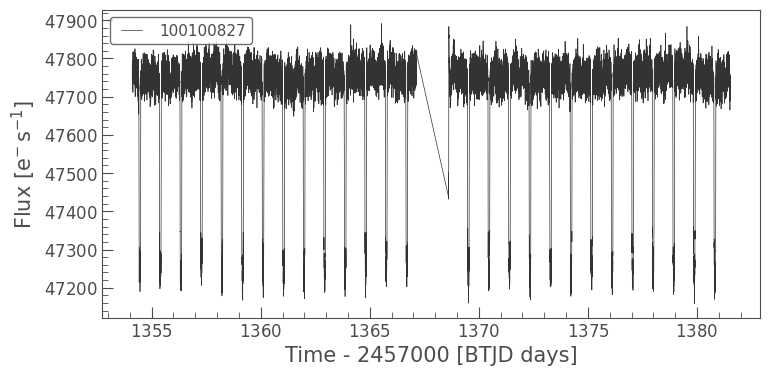

In [3]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('WASP18b_lightcurve.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.LPP`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
lpp_instance = vet.Lpp()
lpp_results = lpp_instance.run(tce, lc)

lpp_results

{'raw_lpp': 0.011281589495513526,
 'norm_lpp': 13.40560844780708,
 'plot_data': {'bin_flux': array([ 3.69748734e-02,  3.20611075e-02,  2.84974091e-02,  2.47755963e-02,
          1.29351234e-02,  1.10559734e-02,  9.04911291e-03,  3.68532445e-03,
         -3.96506861e-03, -1.32817635e-02, -1.66995060e-02, -1.84631106e-02,
         -2.35228296e-02, -3.00907344e-02, -3.80391143e-02, -9.15857852e-02,
         -9.99556065e-01, -1.47551024e+00, -1.57772017e+00, -1.61343014e+00,
         -1.59960103e+00, -1.53118539e+00, -1.35669196e+00, -1.00000000e+00,
         -1.70716882e-01, -1.07050769e-01, -2.82845609e-02, -4.05568108e-02,
         -2.60891784e-02, -2.29025278e-02, -1.52521348e-02, -1.82928313e-02,
         -1.92293655e-02, -1.82928313e-02, -1.70035753e-02, -1.54589023e-02,
         -1.34824486e-02, -1.14208572e-02, -1.09951589e-02, -1.17249265e-02,
          4.35427763e-03,  1.21627869e-02,  1.35311000e-02,  1.91624705e-02,
          2.76338514e-02,  2.51161549e-02,  3.14529650e-02,  3

In LPP, the results are as follows: 
* raw_lpp : Raw LPP value
* norm_lpp : LPP value normalized by period and SNR
* plot_data : The folded, binned transit prior to the LPP transformation

The following attributes are also available after running the vetter object:
* map_info : Map info from ``map_filename`` if supplied when initiating the LPP vetter object.
* lpp_data : `exovetter.lpp.Lppdata` (not much more description than that atm)
* raw_lpp : Raw LPP value, populated by :meth:`run`.
* norm_lpp : LPP value normalized by period and SNR, populated by :meth:`run`.
* plot_data : The folded, binned transit prior to the LPP transformation.
* metrics : lpp result dictionary.

`norm_lpp` is the prefered metric for vetting a TCE as it takes the signal to noise of the transit into account when comparing the shape to known transits.  The `raw_lpp` shows a slight trend with SNR. Typically a value of `norm_lpp` greater than ~3 are not transit-like.

In order to generate diagnostic plots from vetters, we can either use the `plot` method with the vetter object after it has been run, or use `plot=True` as a parameter to the `run` method to do both run and plot at the same time

<Figure size 640x480 with 0 Axes>

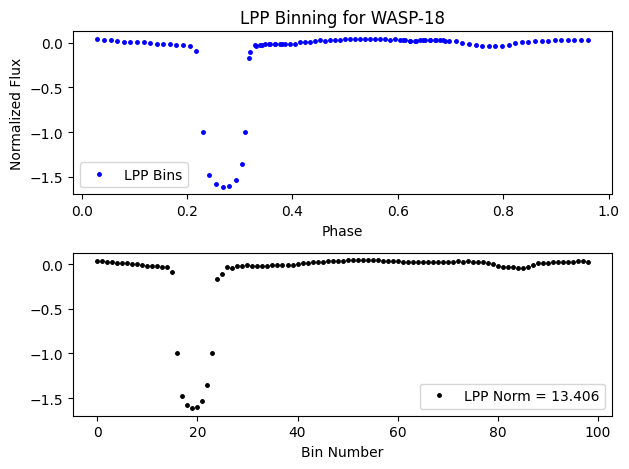

In [5]:
plt.figure()
lpp_instance.plot()
plt.show()

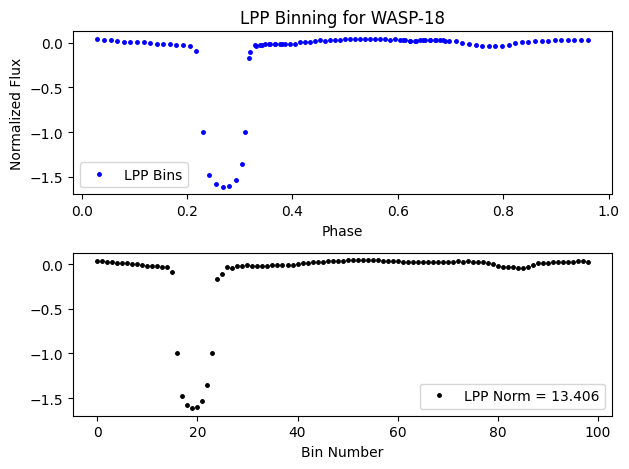

In [6]:
lpp_results = lpp_instance.run(tce, lc, plot=True)